In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers , models
import matplotlib.pyplot as plt
import numpy as np

2023-05-25 20:46:58.074074: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 20:46:58.113444: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 20:46:58.114307: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 20:46:58.825647: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


***Load the dataset***

In [3]:
(X_train , y_train),(X_test ,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

***Here we see there are 50000 training images and 10000 test images***

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)
y_test[:5]

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [10]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10


2023-05-25 20:47:12.614822: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 153600000 exceeds 10% of free system memory.


1563/1563 [==============================] - 29s 18ms/step - loss: 1.8300 - accuracy: 0.4001
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.3333 - accuracy: 0.5250
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1998 - accuracy: 0.5781
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0910 - accuracy: 0.6207
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0160 - accuracy: 0.6496
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9457 - accuracy: 0.6735
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8919 - accuracy: 0.6919
Epoch 8/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8425 - accuracy: 0.7120
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8042 - accuracy: 0.7239
Epoch 10/10
1563/1563 [==============================] - 30s 19ms/step - lo

***With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features***

In [13]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0492 - accuracy: 0.6681


[1.0491687059402466, 0.6680999994277954]

In [14]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[1.24696232e-02, 7.06779072e-04, 5.79514354e-03, 9.06404436e-01,
        3.85321979e-03, 2.97740120e-02, 1.01114353e-02, 1.80197891e-03,
        1.89508349e-02, 1.01325614e-02],
       [3.72376991e-04, 5.03271818e-03, 3.01077677e-07, 1.87467940e-05,
        2.59869881e-09, 8.75285764e-08, 1.40921713e-07, 1.56776825e-09,
        9.94499385e-01, 7.62882191e-05],
       [2.58867174e-01, 1.16883345e-01, 3.45706311e-03, 1.15863094e-02,
        3.18966224e-03, 2.19679554e-03, 2.36888905e-03, 2.96973414e-03,
        2.64831096e-01, 3.33649814e-01],
       [9.69600081e-01, 4.01728612e-04, 1.07606836e-02, 2.15223618e-03,
        5.07316494e-04, 1.43960264e-04, 1.21713302e-03, 1.33110007e-04,
        1.40883103e-02, 9.95429233e-04],
       [5.06710378e-04, 5.07278077e-04, 2.11567227e-02, 3.87968905e-02,
        7.95976639e-01, 9.79414862e-03, 1.32812515e-01, 9.88993706e-05,
        2.77353363e-04, 7.28052109e-05]], dtype=float32)

In [35]:
def plot_sample(X, y, index):
    plt.figure(figsize = (34,22))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

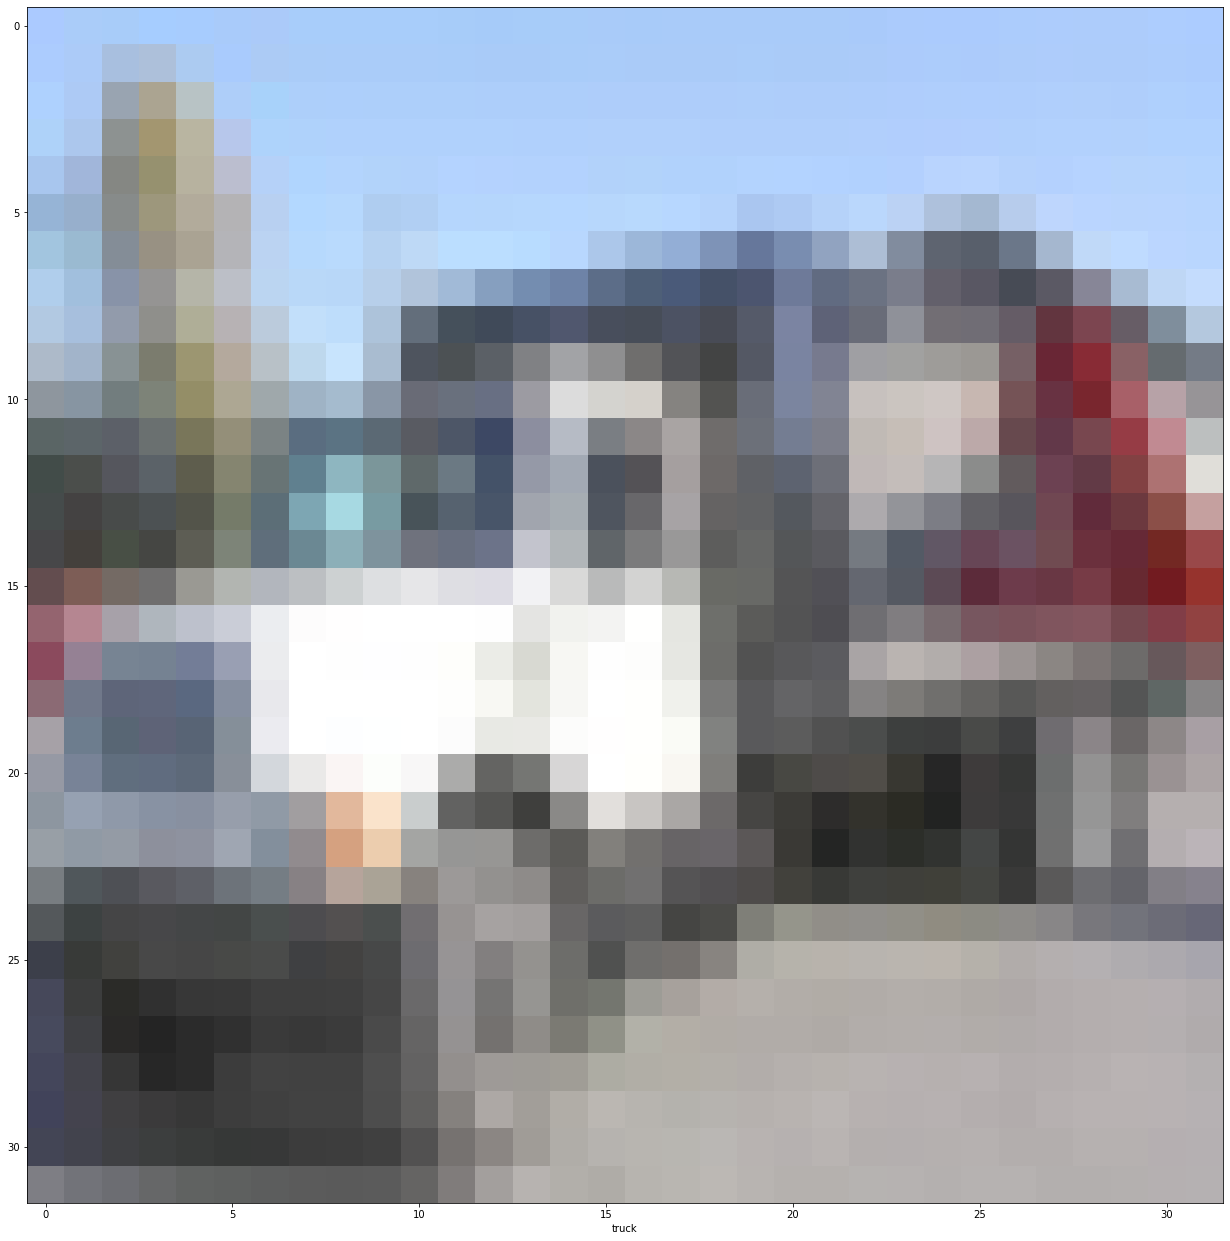

In [36]:
plot_sample(X_test, y_test,45)

In [33]:
y_classes = [np.argmax(element) for element in y_pred]
classes[y_classes[45]]

'truck'

In [34]:
y_test[45]

9

In [25]:
classes[y_classes[1]]

'ship'

In [26]:
classes[y_classes[1]]

'ship'